In [245]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [117]:
df = pd.read_csv('df_after_cohort.csv')

In [243]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth,CohortIndex,Diff,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,1,373 days 12:16:00,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1,373 days 12:16:00,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1,373 days 12:16:00,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,1,373 days 12:16:00,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,1,373 days 12:16:00,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01,2009-12-01,13,0 days 00:00:00,5.90
417530,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13,0 days 00:00:00,3.75
417531,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13,0 days 00:00:00,3.75
417532,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13,0 days 00:00:00,7.50


In [118]:
# drop first column
df = df.iloc[: , 1:]

In [119]:
# get rid of the negative quantity
df = df[df["Quantity"] > 0]

In [262]:
# frequency
frequency = df.groupby('Customer ID')['Invoice'].count()
frequency = frequency.reset_index()
frequency

,Customer ID,Invoice
0,12346.0,33
1,12347.0,71
2,12348.0,20
3,12349.0,102
4,12351.0,21
...,...,...
4309,18283.0,230
4310,18284.0,28
4311,18285.0,12
4312,18286.0,67


In [121]:
# recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # change dateformat
df['Diff'] = max(df['InvoiceDate'])-df['InvoiceDate'] # get the range of first and last
recency = df.groupby('Customer ID')['Diff'].min() # find the last invoice date for each customer
recency = recency.reset_index()
recency['Diff'] = recency['Diff'].dt.days # get the days only without time

In [122]:
# monetary
df['Revenue'] = df['Quantity'] * df['Price']
monetary = df.groupby('Customer ID')['Revenue'].sum()
monetary = monetary.reset_index()

In [69]:
# rfm
rfm = pd.merge(recency, frequency, on='Customer ID', how='inner')
rfm = pd.merge(rfm, monetary, on='Customer ID', how='inner')
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
rfm

,Customer ID,Recency,Frequency,Monetary
0,12346.0,164,33,372.86
1,12347.0,2,71,1323.32
2,12348.0,73,20,222.16
3,12349.0,42,102,2671.14
4,12351.0,10,21,300.93
...,...,...,...,...
4309,18283.0,17,230,641.77
4310,18284.0,66,28,461.68
4311,18285.0,295,12,427.00
4312,18286.0,111,67,1296.43


array([[<AxesSubplot:title={'center':'Customer ID'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'Frequency'}>,
        <AxesSubplot:title={'center':'Monetary'}>]], dtype=object)

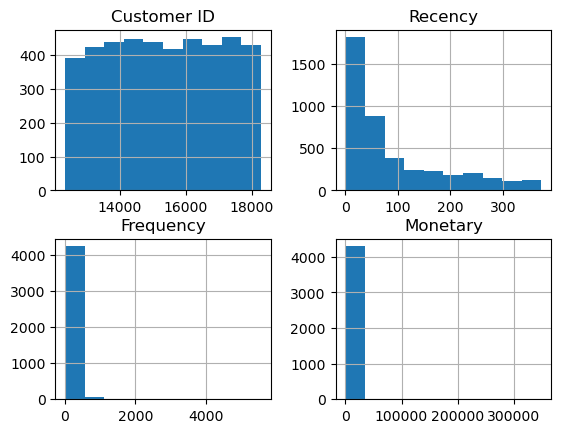

In [97]:
rfm.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0f9f0a430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0f9f0a9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd0f9f0a160>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd0f9f0af70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0e03e7280>,
 'means': []}

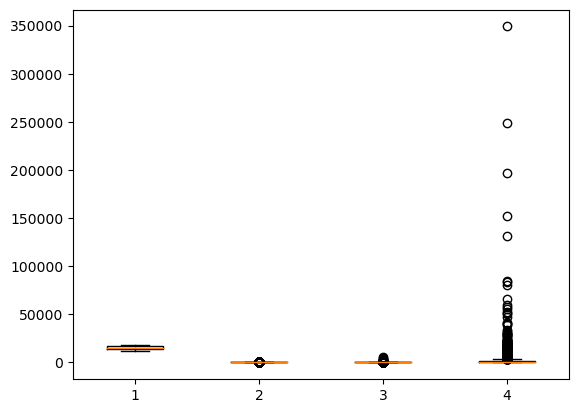

In [91]:
# check boxplots
plt.boxplot(rfm)

In [ ]:
# what I need to look at is why there are so huge outliers in revenue
# for that is might be helpful to see how quantity is distributed and how price is distributed


In [92]:
# price
df['Price'].describe()
# there are crazy outliers
# seems as if these are 

count    407695.000000
mean          3.294188
std          34.756655
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

<AxesSubplot:>

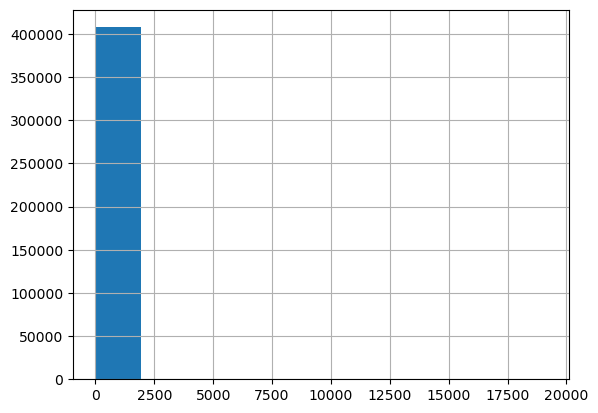

In [94]:
df['Quantity'].hist()

<AxesSubplot:>

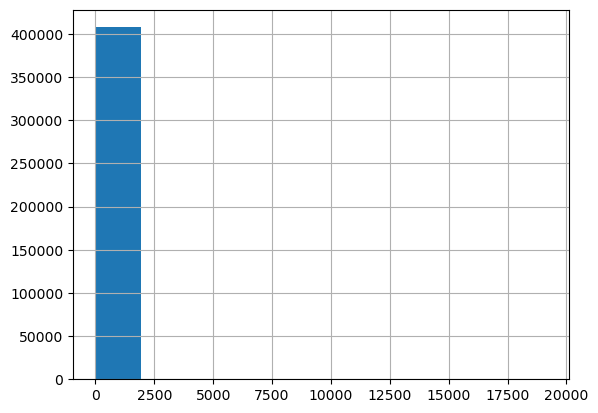

In [96]:
df['Quantity'].describe() 
# here as well.
# meaning that there wholesales customers

# so, what shall be done is actually by customer and have a look how they differ

In [81]:
# find the one row with price equals 10953
max_price = df[df['Price'] == 10468.8]

In [82]:
max_price

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth,CohortIndex,Diff,Revenue
284749,524159,M,Manual,1,2010-09-27 16:12:00,10468.8,14063.0,United Kingdom,2010-09-01,2009-12-01,10,73 days 03:49:00,10468.8


In [83]:
df = df.drop(284749)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0fae4cd60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0fca73340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd0fae4ca90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd0fca738e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0fca73bb0>],
 'means': []}

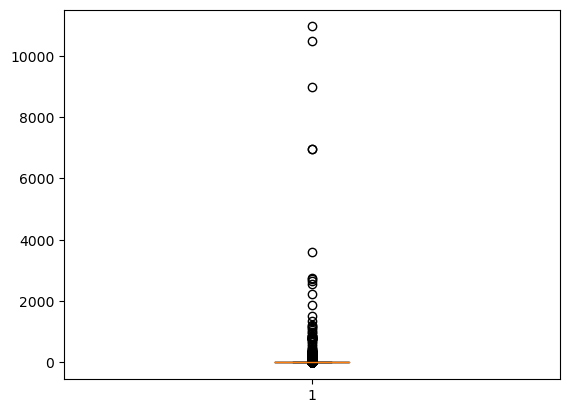

In [142]:
plt.boxplot(df['Price'])

In [84]:
df['Price'].describe()
# but why would kick them out?


# what I would need to do is to find customers that order a lot and all the others
# this is segmentation

count    407693.000000
mean          3.241659
std          25.402079
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8985.600000
Name: Price, dtype: float64

In [112]:
df["Price"].idxmax()

101066

In [113]:
101066 in df[df["StockCode"] == "M"].index

True

In [126]:
df['Price'].describe()

count    407695.000000
mean          3.294188
std          34.756655
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

In [138]:
threshold = df['Price'].quantile(0.95)
threshold

8.5

In [139]:
count = (df['Price'] >= threshold).sum()
count

25172

In [ ]:
result = df[df['Price'] >= threshold]


In [258]:
rfm

,Customer ID,Recency,Frequency,Monetary
0,12346.0,164,33,372.86
1,12347.0,2,71,1323.32
2,12348.0,73,20,222.16
3,12349.0,42,102,2671.14
4,12351.0,10,21,300.93
...,...,...,...,...
4309,18283.0,17,230,641.77
4310,18284.0,66,28,461.68
4311,18285.0,295,12,427.00
4312,18286.0,111,67,1296.43


In [143]:
# oh, now I see, scaling might help me to better understand how the data is distributed
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()

In [145]:
rfm_ss = rfm[['Recency', 'Frequency', 'Monetary']]

In [146]:
rfm_ss

,Recency,Frequency,Monetary
0,164,33,372.86
1,2,71,1323.32
2,73,20,222.16
3,42,102,2671.14
4,10,21,300.93
...,...,...,...
4309,17,230,641.77
4310,66,28,461.68
4311,295,12,427.00
4312,111,67,1296.43


In [147]:
rfm_ss = scaler.fit_transform(rfm_ss)

In [148]:
rfm_ss = pd.DataFrame(rfm_ss)

In [159]:
rfm_ss = rfm_ss.round(2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0a9aed8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0a9aede50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd0a9aed5e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd0a9af8430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0a9af8700>,
 'means': []}

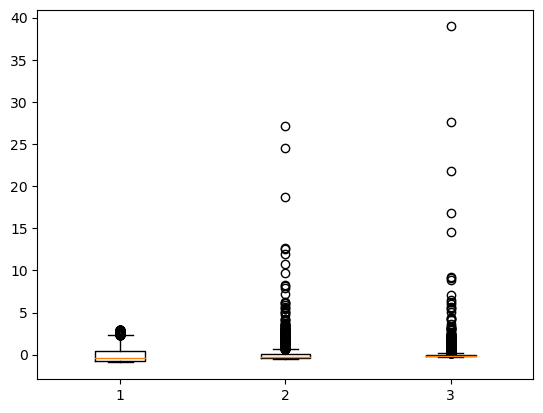

In [160]:
plt.boxplot(rfm_ss)

In [ ]:
# this shows that some are ordering very often, others less
# majoriry generates low revenue while other do the heavy lifting
# so, it is just amazing if one could cluster them properly


# so, the cohort analysis showed us quickly that we need to work on customer retention
# and the segmentation might help us to identify how to segment the customers

# another question is how to make the findings visuals for the segmentation analysis

# now I could set the threshold for 10 at monetary
# and 15 for frquency


# Ive got the RMF
# then I need the score
# but I need to kick out the outliers first


In [162]:
rfm_ss[1].describe()

count    4314.000000
mean        0.000480
std         0.999964
min        -0.460000
25%        -0.380000
50%        -0.250000
75%         0.040000
max        27.110000
Name: 1, dtype: float64

In [ ]:
# oh, this is not how this works
# the scaling didnt help to understand anything

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

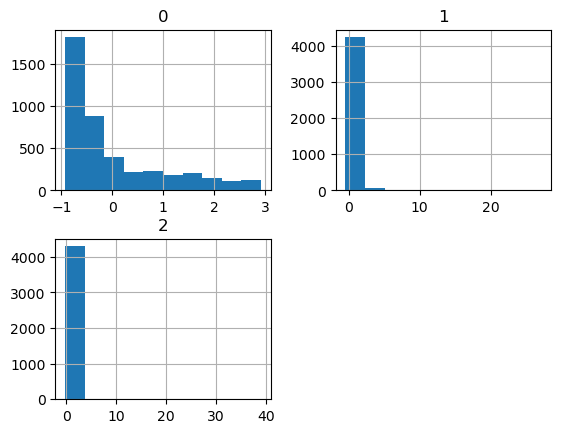

In [163]:
rfm_ss.hist()

In [179]:
threshold = 10

In [251]:
# kick all out above threshold of 10
rfm_ss

,0,1,2,Customer ID
0,0.76,-0.30,-0.19,12346.0
1,-0.91,-0.12,-0.08,12347.0
2,-0.18,-0.37,-0.20,12348.0
3,-0.50,0.04,0.07,12349.0
4,-0.83,-0.36,-0.20,12351.0
...,...,...,...,...
4309,-0.76,0.67,-0.16,18283.0
4310,-0.25,-0.33,-0.18,18284.0
4311,2.11,-0.41,-0.18,18285.0
4312,0.21,-0.14,-0.08,18286.0


In [180]:
count_freq = (rfm_ss[1] >= threshold_freq).sum()
count_freq

7

In [181]:
count_monet = (rfm_ss[2] >= threshold_freq).sum()
count_monet

5

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0eb434700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0eb434ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd0eb434430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd0eac93280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0eac93550>],
 'means': []}

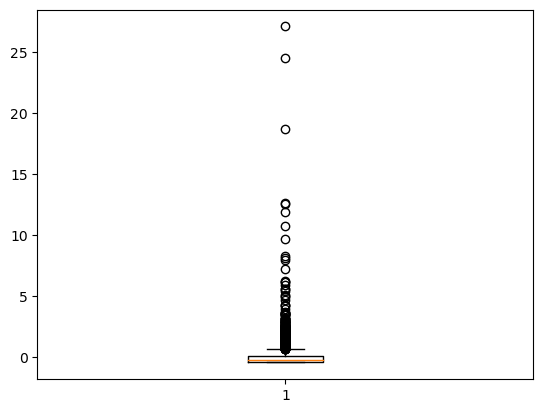

In [185]:
plt.boxplot(rfm_ss[1])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0daf6a700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0daf6aca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd0daf6a400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd0daf79280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0daf79550>],
 'means': []}

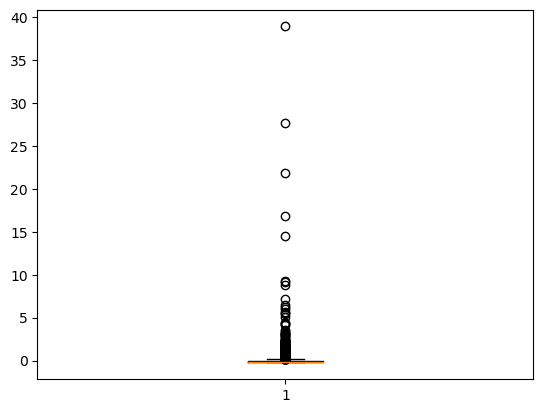

In [186]:
plt.boxplot(rfm_ss[2])



In [252]:
rfm_cleaned = rfm_ss[(rfm_ss.iloc[:, 0] < 10) & (rfm_ss.iloc[:, 1] < 10)]


In [253]:
rfm_cleaned

,0,1,2,Customer ID
0,0.76,-0.30,-0.19,12346.0
1,-0.91,-0.12,-0.08,12347.0
2,-0.18,-0.37,-0.20,12348.0
3,-0.50,0.04,0.07,12349.0
4,-0.83,-0.36,-0.20,12351.0
...,...,...,...,...
4309,-0.76,0.67,-0.16,18283.0
4310,-0.25,-0.33,-0.18,18284.0
4311,2.11,-0.41,-0.18,18285.0
4312,0.21,-0.14,-0.08,18286.0


In [233]:
# how do I add back the customer ids?
rfm_cleaned['Customer ID'] = rfm['Customer ID']

/var/folders/wq/2vxkh_6d4g7dpxkr5q82nxzh0000gn/T/ipykernel_34433/3781405613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_cleaned['Customer ID'] = rfm['Customer ID']


In [234]:
rfm_cleaned

,0,1,2,Customer ID
0,0.76,-0.30,-0.19,12346.0
1,-0.91,-0.12,-0.08,12347.0
2,-0.18,-0.37,-0.20,12348.0
3,-0.50,0.04,0.07,12349.0
4,-0.83,-0.36,-0.20,12351.0
...,...,...,...,...
4309,-0.76,0.67,-0.16,18283.0
4310,-0.25,-0.33,-0.18,18284.0
4311,2.11,-0.41,-0.18,18285.0
4312,0.21,-0.14,-0.08,18286.0


In [195]:
rfm_ss

,0,1,2,Customer ID
0,0.76,-0.30,-0.19,12346.0
1,-0.91,-0.12,-0.08,12347.0
2,-0.18,-0.37,-0.20,12348.0
3,-0.50,0.04,0.07,12349.0
4,-0.83,-0.36,-0.20,12351.0
...,...,...,...,...
4309,-0.76,0.67,-0.16,18283.0
4310,-0.25,-0.33,-0.18,18284.0
4311,2.11,-0.41,-0.18,18285.0
4312,0.21,-0.14,-0.08,18286.0


In [196]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [208]:
rfm_c = rfm_ss

In [254]:
rfm_cleaned = rfm_cleaned.rename(columns={0: 'recency',
                        1: 'frequency',
                        2: 'monetary',
                        'Customer ID':'customer_id'})


In [255]:
rfm_cleaned

,recency,frequency,monetary,customer_id
0,0.76,-0.30,-0.19,12346.0
1,-0.91,-0.12,-0.08,12347.0
2,-0.18,-0.37,-0.20,12348.0
3,-0.50,0.04,0.07,12349.0
4,-0.83,-0.36,-0.20,12351.0
...,...,...,...,...
4309,-0.76,0.67,-0.16,18283.0
4310,-0.25,-0.33,-0.18,18284.0
4311,2.11,-0.41,-0.18,18285.0
4312,0.21,-0.14,-0.08,18286.0


In [225]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_c)

KMeans(max_iter=50, n_clusters=3)

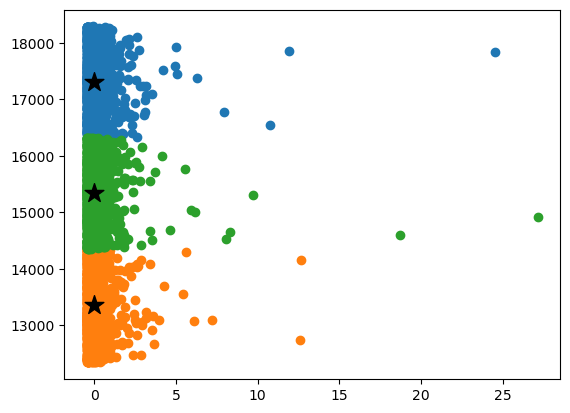

In [224]:
labels = kmeans.predict(rfm_c)
clusters = np.unique(labels)

centers = kmeans.cluster_centers_

for cluster in clusters:
    row_ix = np.where(labels == cluster)
    plt.scatter(rfm_c.to_numpy()[row_ix, 1], rfm_c.to_numpy()[row_ix, 3])
    
plt.scatter(centers[:, 1], centers[:, 3], s=200, marker='*', c='black')

plt.show()

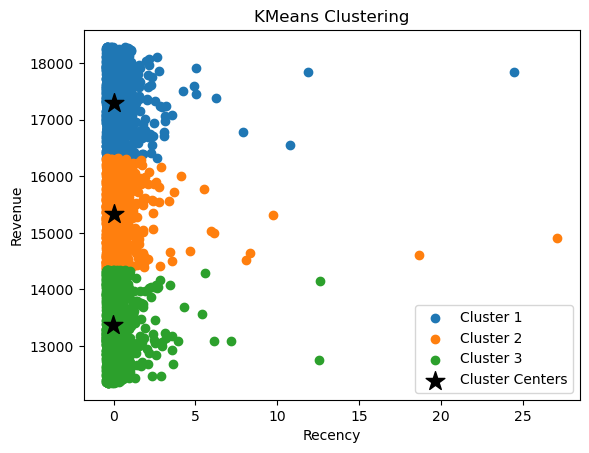

In [230]:
# Predict cluster labels for the input data using KMeans algorithm
labels = kmeans.predict(rfm_c)

# Extract unique cluster labels from the predicted labels
clusters = np.unique(labels)

# Calculate the cluster centers using KMeans algorithm
centers = kmeans.cluster_centers_

# Loop over the unique cluster labels
for cluster in clusters:
    # Extract the indices of the data points belonging to the current cluster label
    row_ix = np.where(labels == cluster)
    
    # Create a scatter plot of the data points belonging to the current cluster label
    plt.scatter(rfm_c.to_numpy()[row_ix, 1], rfm_c.to_numpy()[row_ix, 3], label=f'Cluster {cluster+1}')

# Add the cluster centers to the scatter plot
plt.scatter(centers[:, 1], centers[:, 3], s=200, marker='*', c='black', label='Cluster Centers')

# Add axis labels and title to the plot
plt.xlabel('Recency')
plt.ylabel('Revenue')
plt.title('KMeans Clustering')

# Add a legend to the plot
plt.legend()

# Display the scatter plot
plt.show()


In [249]:
rfm_cleaned

,recency,frequency,monetary,customer_id,cluster
0,0.76,-0.30,-0.19,12346.0,1
1,-0.91,-0.12,-0.08,12347.0,1
2,-0.18,-0.37,-0.20,12348.0,1
3,-0.50,0.04,0.07,12349.0,1
4,-0.83,-0.36,-0.20,12351.0,1
...,...,...,...,...,...
4309,-0.76,0.67,-0.16,18283.0,0
4310,-0.25,-0.33,-0.18,18284.0,0
4311,2.11,-0.41,-0.18,18285.0,0
4312,0.21,-0.14,-0.08,18286.0,0


In [259]:
rfm

,Customer ID,Recency,Frequency,Monetary
0,12346.0,164,33,372.86
1,12347.0,2,71,1323.32
2,12348.0,73,20,222.16
3,12349.0,42,102,2671.14
4,12351.0,10,21,300.93
...,...,...,...,...
4309,18283.0,17,230,641.77
4310,18284.0,66,28,461.68
4311,18285.0,295,12,427.00
4312,18286.0,111,67,1296.43


KeyError: 'Frequency'

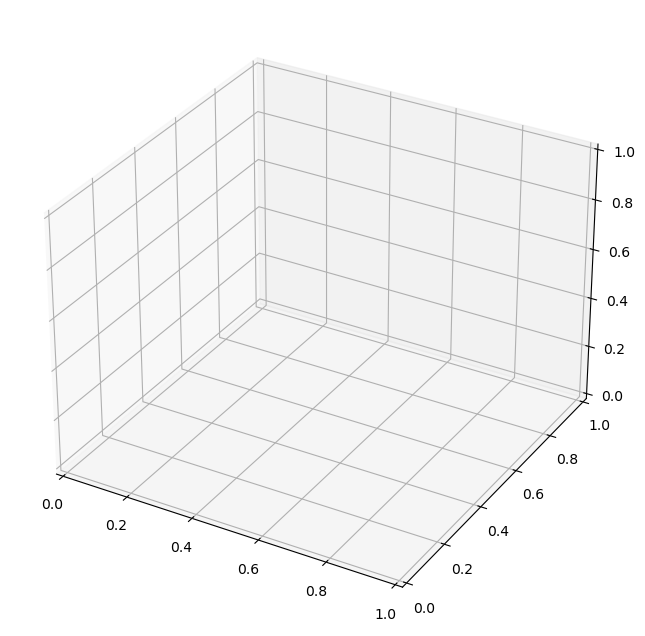

In [261]:


# Cluster the data
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm)

# Assign cluster labels to each data point
labels = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'], rfm_cleaned['Frequency'], rfm_cleaned['Monetary'], c=labels, s=60)

# Add axis labels and a title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('KMeans Clustering of RFM Data')

plt.show()


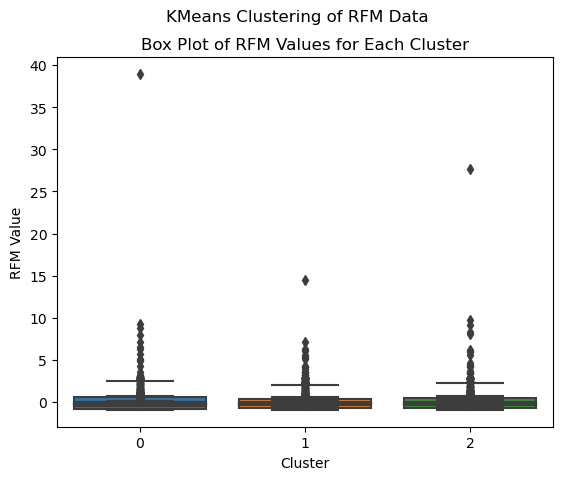

In [241]:
import seaborn as sns

# Add cluster labels to the RFM data
rfm_cleaned['cluster'] = labels

# Create a box plot of RFM values for each cluster
sns.boxplot(x='cluster', y='recency', data=rfm_cleaned)
sns.boxplot(x='cluster', y='frequency', data=rfm_cleaned)
sns.boxplot(x='cluster', y='monetary', data=rfm_cleaned)

# Add titles and axis labels
plt.suptitle('KMeans Clustering of RFM Data')
plt.title('Box Plot of RFM Values for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('RFM Value')

plt.show()

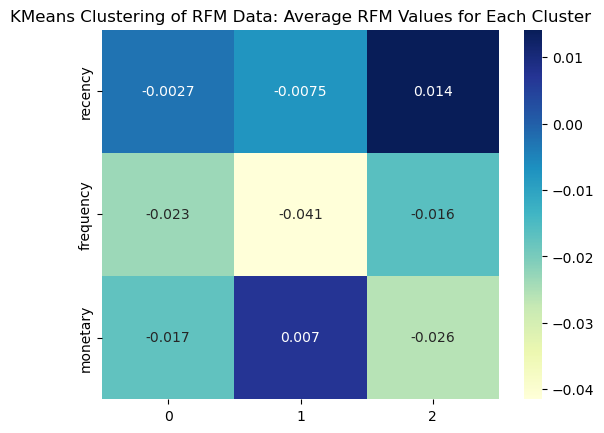

In [242]:
import numpy as np

# Calculate the mean RFM values for each cluster
rfm_means = rfm_cleaned.groupby('cluster').mean().reset_index()

# Create a heatmap of the mean RFM values
sns.heatmap(rfm_means[['recency', 'frequency', 'monetary']].T, cmap='YlGnBu', annot=True)

# Add a title
plt.title('KMeans Clustering of RFM Data: Average RFM Values for Each Cluster')

plt.show()


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

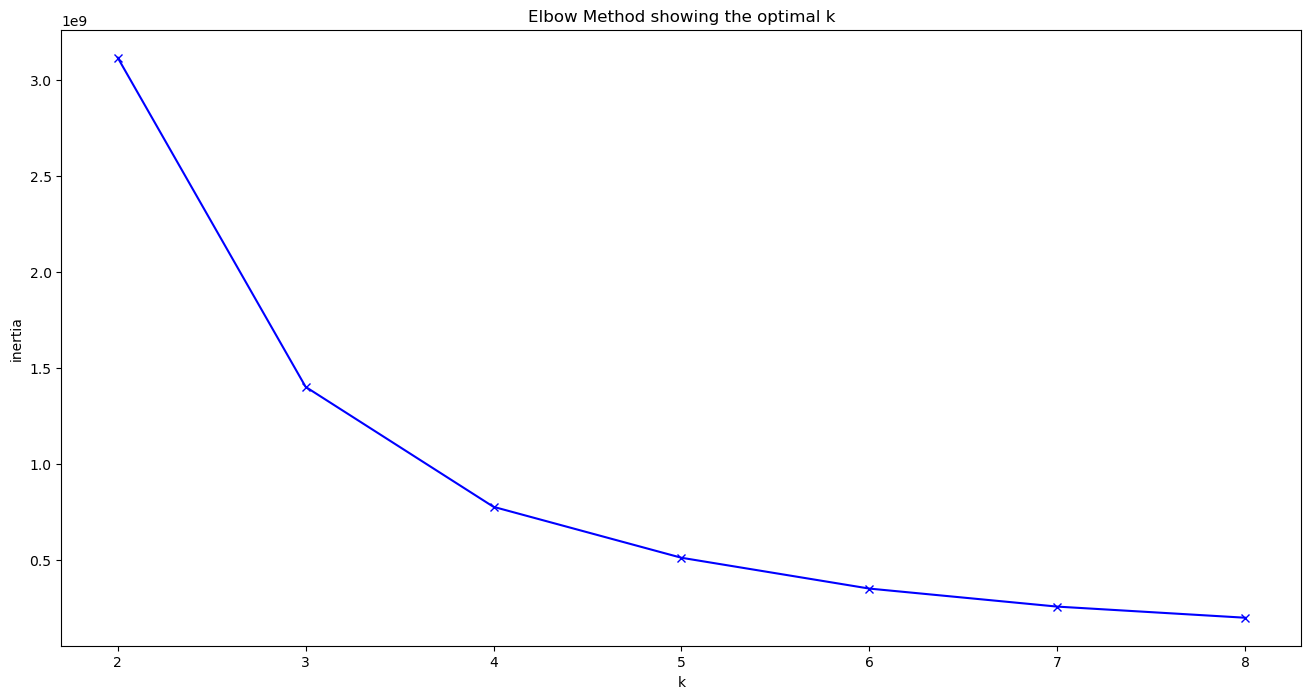

In [217]:
K = range(2, 9)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(rfm_c)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')